In [1]:
%load_ext autoreload
%autoreload 2

# Chloropleth Plots for Stats about articles

For example: median views, number of articles, etc

In [2]:
import pandas as pd
import numpy as np

## Load and Preprocess Base DataFrames

In [3]:
df_crawled = pd.read_csv('data/events/all_events.csv.gz').drop_duplicates()

df_crawled.event_date = pd.to_datetime(df_crawled.event_date)
df_crawled['views_7_sum_log'] = np.log1p(df_crawled.views_7_sum)
df_crawled['edits_7_sum_log'] = np.log1p(df_crawled.edits_7_sum)

df_reg = df_crawled[(df_crawled.cat != 'undefined') & (df_crawled.year > 2015) & ~(
            (df_crawled.event_date.dt.month == 1) & (df_crawled.event_date.dt.day == 1))]
df_view_reg = df_crawled[(df_crawled.cat != 'undefined') & (df_crawled.year > 2015) & ~(
            (df_crawled.event_date.dt.month == 1) & (df_crawled.event_date.dt.day == 1)) & (
                                     df_crawled.views_7_sum > 10)]
df_edit_reg = df_crawled[(df_crawled.cat != 'undefined') & (df_crawled.year > 2015) & ~(
            (df_crawled.event_date.dt.month == 1) & (df_crawled.event_date.dt.day == 1)) & (df_crawled.edits_7_sum > 0)]

## Plot Chloropleth maps for raw article stats

In [4]:
from util.plot import build_chloropleths_df
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family': 'sans-serif',
                     'font.sans-serif': 'Noto Sans'})

### Median Views and Edits

views_7_sum_log_country_code_median_de
views_7_sum_log_country_code_median_en
views_7_sum_log_country_code_median_es
views_7_sum_log_country_code_median_it


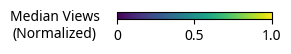

In [7]:
figs_geo, fig_cmap = build_chloropleths_df(df_view_reg, column='views_7_sum_log', group_col='code',
                                           color_data='country', color_map='name_en', cm_chloropleth=mpl.cm.viridis,
                                           relative_scale=True, metric='median', cb_horizontal=True,
                                           cb_label='Median Views\n(Normalized)')
# if you want to see the figures here, uncomment this
#for fig in figs_geo:
#    display(fig)

edits_7_sum_log_country_code_median_de
edits_7_sum_log_country_code_median_en
edits_7_sum_log_country_code_median_es
edits_7_sum_log_country_code_median_it


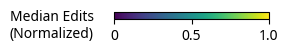

In [8]:
figs_geo, fig_cmap = build_chloropleths_df(df_edit_reg, column='edits_7_sum_log', group_col='code',
                                           color_data='country', color_map='name_en',
                                           cm_chloropleth=mpl.cm.viridis, relative_scale=True, metric='median',
                                           cb_horizontal=True, cb_label='Median Edits\n(Normalized)')
#for fig in figs_geo:
#    display(fig)

### Number of articles with >10 views and >0 edits

views_7_sum_log_country_code_count_de
views_7_sum_log_country_code_count_en
views_7_sum_log_country_code_count_es
views_7_sum_log_country_code_count_it


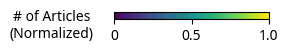

In [9]:
figs_geo, fig_cmap = build_chloropleths_df(df_view_reg, column='views_7_sum_log', group_col='code',
                                           color_data='country', color_map='name_en',
                                           cm_chloropleth=mpl.cm.viridis, relative_scale=True, metric='count',
                                           cb_horizontal=True, cb_label='# of Articles\n(Normalized)')
#for fig in figs_geo:
#    display(fig)

edits_7_sum_log_country_code_count_de
edits_7_sum_log_country_code_count_en
edits_7_sum_log_country_code_count_es
edits_7_sum_log_country_code_count_it


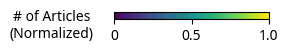

In [11]:
figs_geo, fig_cmap = build_chloropleths_df(df_edit_reg, column='edits_7_sum_log', group_col='code',
                                           color_data='country', color_map='name_en',
                                           cm_chloropleth=mpl.cm.viridis, relative_scale=True, metric='count',
                                           cb_horizontal=True, cb_label='# of Articles\n(Normalized)')
#for fig in figs_geo:
#    display(fig)

## Plot Internet accessibility vs. access from country to wiki
views_baseline describes the access from a certain county towards a Wiki in a specific period. It should act as a proxy for internet access, as Wikipedia is one of the most essential sites on the internet and frequently accessed, if internet access is available.

In [153]:
from util.preprocessing import replace_country_names
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
df_population = df_crawled[df_crawled.code=='en'][['country', 'year', 'population', 'views_baseline', 'view_country_article', 'GDP_pc']].drop_duplicates()
df_population['population_log'] = np.log(df_population.population)
df_population['views_baseline_log'] = np.log1p(df_population.views_baseline)
df_population['view_country_article_log'] = np.log1p(df_population.view_country_article)
df_population['GDP_pc_log'] = np.log(df_population.GDP_pc)

df_int_perc = pd.read_csv('data/supp/internet_percentage.csv')[['Country Name', '2015', '2016', '2017', '2018', '2019', '2020']].rename(
    {'Country Name': 'country'}, axis=1)
replace_country_names(df_int_perc, inplace=True)
df_int_perc[['2015', '2016', '2017', '2018', '2019', '2020']] = df_int_perc[['2015', '2016', '2017', '2018', '2019', '2020']] / 100
df_int_perc = df_int_perc.melt('country', ['2015', '2016', '2017', '2018', '2019', '2020'], 'year', 'internet_percentage')
df_int_perc.year = df_int_perc.year.astype(int)

df_population = df_population.merge(df_int_perc, on=['country', 'year'], how='left')
df_population['internet_raw'] = df_population.population * df_population.internet_percentage
df_population['internet_raw_log'] = np.log(df_population.internet_raw)
df_population.dropna(inplace=True)

In [176]:
df_population.dropna(subset=['country'])

,country,year,population,views_baseline,view_country_article,GDP_pc,population_log,views_baseline_log,view_country_article_log,GDP_pc_log,internet_percentage,internet_raw,internet_raw_log
0,Pakistan,2016,2.036314e+08,8.536700e+07,13789.0,1362.860008,19.131822,18.262470,9.531699,7.217341,0.123854,2.522065e+07,17.043174
1,United States,2020,3.294841e+08,3.151887e+09,48147.0,63122.594145,19.613039,21.871267,10.782035,11.052834,0.909000,2.995011e+08,19.517629
2,India,2020,1.380004e+09,7.199060e+08,33666.0,1930.971218,21.045353,20.394631,10.424273,7.565778,0.430000,5.934019e+08,20.201382
3,South Africa,2020,5.930869e+07,6.305050e+07,12988.0,5094.384038,17.898266,17.959447,9.471858,8.535894,0.700000,4.151608e+07,17.541591
4,United States,2020,3.294841e+08,3.310591e+09,51047.0,63122.594145,19.613039,21.920393,10.840522,11.052834,0.909000,2.995011e+08,19.517629
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4818,France,2020,6.739158e+07,6.842950e+07,14008.0,38958.603419,18.026031,18.041315,9.547455,10.570255,0.848000,5.714806e+07,17.861156
4819,United States,2020,3.294841e+08,3.151887e+09,47793.0,63122.594145,19.613039,21.871267,10.774655,11.052834,0.909000,2.995011e+08,19.517629
4820,China,2020,1.410929e+09,1.578000e+06,19474.0,10228.970558,21.067514,14.271669,9.876887,9.232979,0.700528,9.883950e+08,20.711593
4821,Canada,2020,3.800524e+07,3.634645e+08,23859.0,43559.710092,17.453235,19.711192,10.079959,10.681888,0.923000,3.507883e+07,17.373109


In [190]:
mod = smf.ols(formula='internet_raw_log ~ GDP_pc_log + population_log', data=df_population)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       internet_raw_log   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 9.158e+04
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        10:55:24   Log-Likelihood:                -521.21
No. Observations:                4636   AIC:                             1048.
Df Residuals:                    4633   BIC:                             1068.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.3000      0.053    -61.757      0.000      -3.405      -3.195
GDP_pc_log         0.3328      0.003    106.132      0.000       0.327       0.339
population_log     0.9802      0.002    422.791      0.000       0.976       0.985
==============================================================================
Omnibus:                     1987.048   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22250.198
Skew:                          -1.736   Prob(JB):                         0.00
Kurtosis:                      13.155   Cond. No.                         272.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
mod = smf.ols(formula='internet_raw_log ~ GDP_pc_log + population_log + views_baseline', data=df_population)
res = mod.fit()
res.summary()

In [152]:
mod = smf.ols(formula='internet_percentage ~ views_baseline_log * population_log * view_country_article_log', data=df_population)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     internet_percentage   R-squared:                       0.579
Model:                             OLS   Adj. R-squared:                  0.578
Method:                  Least Squares   F-statistic:                     908.6
Date:                 Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                         10:40:13   Log-Likelihood:                 2341.1
No. Observations:                 4636   AIC:                            -4666.
Df Residuals:                     4628   BIC:                            -4615.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      7.0905      0.839      8.449      0.000       5.445       8.736
views_baseline_log                                            -0.1044      0.060     -1.737      0.082      -0.222       0.013
population_log                                                -0.5220      0.053     -9.829      0.000      -0.626      -0.418
views_baseline_log:population_log                              0.0098      0.004      2.770      0.006       0.003       0.017
view_country_article_log                                      -1.2018      0.091    -13.182      0.000      -1.381      -1.023
views_baseline_log:view_country_article_log                    0.0538      0.006      8.912      0.000       0.042       0.066
population_log:view_country_article_log                        0.0801      0.006     14.166      0.000       0.069       0.091
views_baseline_log:population_log:view_country_article_log    -0.0032      0.000     -9.113      0.000      -0.004      -0.002
==============================================================================
Omnibus:                      555.610   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              935.276
Skew:                          -0.820   Prob(JB):                    8.08e-204
Kurtosis:                       4.467   Cond. No.                     1.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
df_population[(df_population.year == 2020) & (df_population.views_baseline_log > 0)][[col for col in df_population.columns if 'log' in col or '_percentage' in col]].corr('spearman')

,population_log,views_baseline_log,view_country_article_log,GDP_pc_log,internet_percentage,internet_raw_log
population_log,1.000000,0.619528,0.762341,0.152028,-0.085566,0.978590
views_baseline_log,0.619528,1.000000,0.882288,0.641505,0.449537,0.672905
view_country_article_log,0.762341,0.882288,1.000000,0.601458,0.376161,0.812967
GDP_pc_log,0.152028,0.641505,0.601458,1.000000,0.748837,0.249564
internet_percentage,-0.085566,0.449537,0.376161,0.748837,1.000000,0.048107
internet_raw_log,0.978590,0.672905,0.812967,0.249564,0.048107,1.000000


In [168]:
vif_cols = ['GDP_pc_log','views_baseline_log', 'view_country_article_log', 'internet_percentage']

# Create an empty DataFrame to store the VIF values
vif_df = pd.DataFrame(columns=['variable', 'vif'])

# Loop through each predictor variable and calculate its VIF
for i in range(len(vif_cols)):
    vif = variance_inflation_factor(df_population[vif_cols].values, i)
    vif_df.loc[i] = [vif_cols[i], vif]
vif_df

,variable,vif
0,GDP_pc_log,283.365341
1,views_baseline_log,263.957266
2,view_country_article_log,391.201139
3,internet_percentage,52.386222


#### Thoughts:
- GDP_pc obviously measures how rich a country is, and more or less also dictates how many people have access to the internet.
- as GDP_pc is a very strong predictor of internet access, combining it with the (already existing) variable population leads to high multicollinearity in the model. Fitting

<AxesSubplot:xlabel='population_log', ylabel='internet_raw_log'>

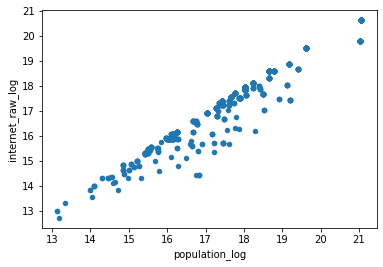

In [192]:
df_population[(df_population.year == 2019) & (df_population.views_baseline_log > 0)].plot.scatter(x='population_log', y='internet_raw_log')

<AxesSubplot:xlabel='GDP_pc_log', ylabel='internet_percentage'>

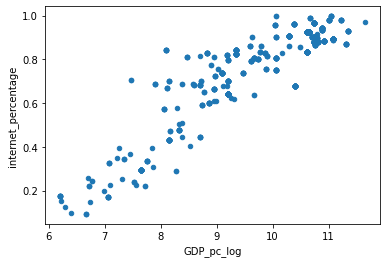

In [194]:
df_population[(df_population.year == 2019) & (df_population.views_baseline_log > 0)].plot.scatter(x='GDP_pc_log', y='internet_percentage')